# Python과 scikit-learn을 사용해 클러스터링 분석을 수행하여 데이터에 숨겨진 그룹을 발견
***
## 목표
- 문제 정의
    - 클러스터링을 사용하여 해결하고자 하는 자신만의 문제를 정의
    - 문제 정의에는 분석하고자 하는 목적과 예상되는 결과를 포함
- 데이터 선택
    - 선택한 데이터셋의 구조와 해당 데이터가 문제 해결에 어떻게 도움이 될 수 있는지 설명
- 데이터 전처리
    - 데이터를 로드하고 필요한 경우 결측치 처리, 데이터 정규화, 변수 선택 등의 전처리 작업을 수행
- K-means 클러스터링 적용
    - K-means 클러스터링 알고리즘을 사용하여 데이터를 클러스터링
- 엘보우 방법을 사용하여 최적의 클러스터 수, K를 결정하고, 클러스터 수에 따른 WCSS를 그래프로 나타내기
- 결정된 K 값으로 K-means 알고리즘을 초기화하고 클러스터링을 수행
- 클러스터 분석
    - 각 클러스터의 중심점을 분석하고, 중심점을 바탕으로 각 클러스터의 특성을 설명
    - 클러스터를 시각화하여 각 클러스터가 어떻게 구성되어 있는지 보여주는 산점도를 작성
- 평가
    - 실루엣 점수를 사용하여 클러스터링의 효과를 평가하세요. 실루엣 점수가 클러스터링 결과에 대해 어떤 정보를 제공하는지 설명
***

## 문제정의
- 카드 이용 패턴과 연령의 상관관계 분석
- 각 시장의 카드 이용 패턴이 연령과 어떤 관련이 있는지 분석, 특정 시장에서는 특정 연령층의 이용이 두드러지는지, 또는 다양한 연령층이 균일하게 분포되어 있는지 등을 조사
- 이를 통해 20대가 두드러지는 시장이라면 해당 연령을 타겟으로 하는 이벤트를 개최하는 등의 마케팅 전략을 세워볼 수 있음.

- 예상: 제주 동문시장에 대하여 MZ핫플이라는 기사를 본 적이 있으므로 20는 제주 동문시장이 다른 연령대와 비교했을 때 다른 시장보다 더 많이 갈 것이라고 생각.

## 데이터 선택
- https://www.data.go.kr/data/15046090/fileData.do
- 2014~2016년도 주요 전통시장 별로 카드이용자수, 카드이용건수, 카드이용금액 등 정보 제공
- 이 데이터는 특정 각 시장별로 연령대, 성별, 거리 등으로 가드 이용건수 등을 파악할 수 있어 이 데이터를 선택함.
***

In [1]:
# 필요 라이브러리 import 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
data = pd.read_csv('./data/제주특별자치도_9시장별소비패턴현황_20170216.csv', encoding='cp949')

data

,기준년도,시장 번호,시장명,카드이용자수,카드이용건수,카드이용금액,카드이용자수: 남,카드이용자수: 여,카드이용자수: 20대 이하,카드이용자수: 30대,...,카드이용자수: 50대 이상,카드이용자수: ~1km,카드이용자수: 1~3km,카드이용자수: 3~5km,카드이용자수: 5km~,카드이용금액: 주말,카드이용금액: 주중,카드이용금액: 8~18시,카드이용금액: 18시~8시,데이터기준일자
0,2014,1,제주 동문시장,85686,174498,16901792933,37656,36777,8155,20183,...,29990,3490,10249,5162,56822,2927069527,13974723406,14679209222,2152264801,2017.2.16
1,2015,1,제주 동문시장,143526,284223,22896627341,63087,64524,21888,37691,...,41307,3945,11525,5838,107064,4496075255,18400552086,19460984705,3336297726,2017.2.16
2,2016,1,제주 동문시장,170819,322070,23243065598,74661,78267,31338,40848,...,48011,4905,13527,6804,127904,4848489965,18394575633,19519521143,3593884845,2017.2.16
3,2014,2,제주 서문시장,4331,7796,515384831,2285,1169,296,839,...,1465,551,876,604,1481,131074890,384309941,215174671,297303660,2017.2.16
4,2015,2,제주 서문시장,6206,11107,726668519,3392,1785,638,1258,...,1963,730,1176,823,2481,191122250,535546269,303827369,422015150,2017.2.16
5,2016,2,제주 서문시장,6851,11001,721327107,3677,1983,864,1394,...,1935,789,1188,797,2906,184353300,536973807,308540304,412181553,2017.2.16
6,2014,3,제주 보성시장,5529,9848,386447731,2986,1816,504,1295,...,1730,1011,1483,752,1644,84107890,302339841,259394031,127037400,2017.2.16
7,2015,3,제주 보성시장,6713,13112,542409651,3615,2252,639,1443,...,2141,1186,1788,894,2047,130494309,411915342,343256752,199152899,2017.2.16
8,2016,3,제주 보성시장,8193,14309,526394492,4436,2700,773,1658,...,2651,1469,2106,1115,2460,138974942,387419550,324778142,201451800,2017.2.16
9,2014,4,서귀포 매일올레시장,47225,99105,7449225162,20368,20368,5287,13256,...,13223,3218,2788,1742,33625,1909087820,5540137342,4816233490,2487105732,2017.2.16


In [3]:
# 결측치 확인.
data.info()
# 없으므로 결측치에 대한 전처리는 진행하지 않음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   기준년도            24 non-null     int64 
 1   시장 번호           24 non-null     int64 
 2   시장명             24 non-null     object
 3   카드이용자수          24 non-null     int64 
 4   카드이용건수          24 non-null     int64 
 5   카드이용금액          24 non-null     int64 
 6   카드이용자수: 남       24 non-null     int64 
 7   카드이용자수: 여       24 non-null     int64 
 8   카드이용자수: 20대 이하  24 non-null     int64 
 9   카드이용자수: 30대     24 non-null     int64 
 10  카드이용자수: 40대     24 non-null     int64 
 11  카드이용자수: 50대 이상  24 non-null     int64 
 12  카드이용자수: ~1km    24 non-null     int64 
 13  카드이용자수: 1~3km   24 non-null     int64 
 14  카드이용자수: 3~5km   24 non-null     int64 
 15  카드이용자수: 5km~    24 non-null     int64 
 16  카드이용금액: 주말      24 non-null     int64 
 17  카드이용금액: 주중      24 non-null     int64 
 18  카드이용금액: 8~18

In [4]:
# 연령별 카드이용자수를 파악하기 위함임으로 해당 데이터만 골라 새로운 데이터 프레임 생성
df = data[['기준년도', '시장명', '카드이용자수: 20대 이하', '카드이용자수: 30대', '카드이용자수: 40대', '카드이용자수: 50대 이상']]
df.columns = ['year', 'market', 'under_20s', '30s', '40s', 'more_50s'] #컬럼명 변경

df

,year,market,under_20s,30s,40s,more_50s
0,2014,제주 동문시장,8155,20183,17358,29990
1,2015,제주 동문시장,21888,37691,27454,41307
2,2016,제주 동문시장,31338,40848,32931,48011
3,2014,제주 서문시장,296,839,912,1465
4,2015,제주 서문시장,638,1258,1350,1963
5,2016,제주 서문시장,864,1394,1485,1935
6,2014,제주 보성시장,504,1295,1361,1730
7,2015,제주 보성시장,639,1443,1690,2141
8,2016,제주 보성시장,773,1658,2069,2651
9,2014,서귀포 매일올레시장,5287,13256,9586,13223


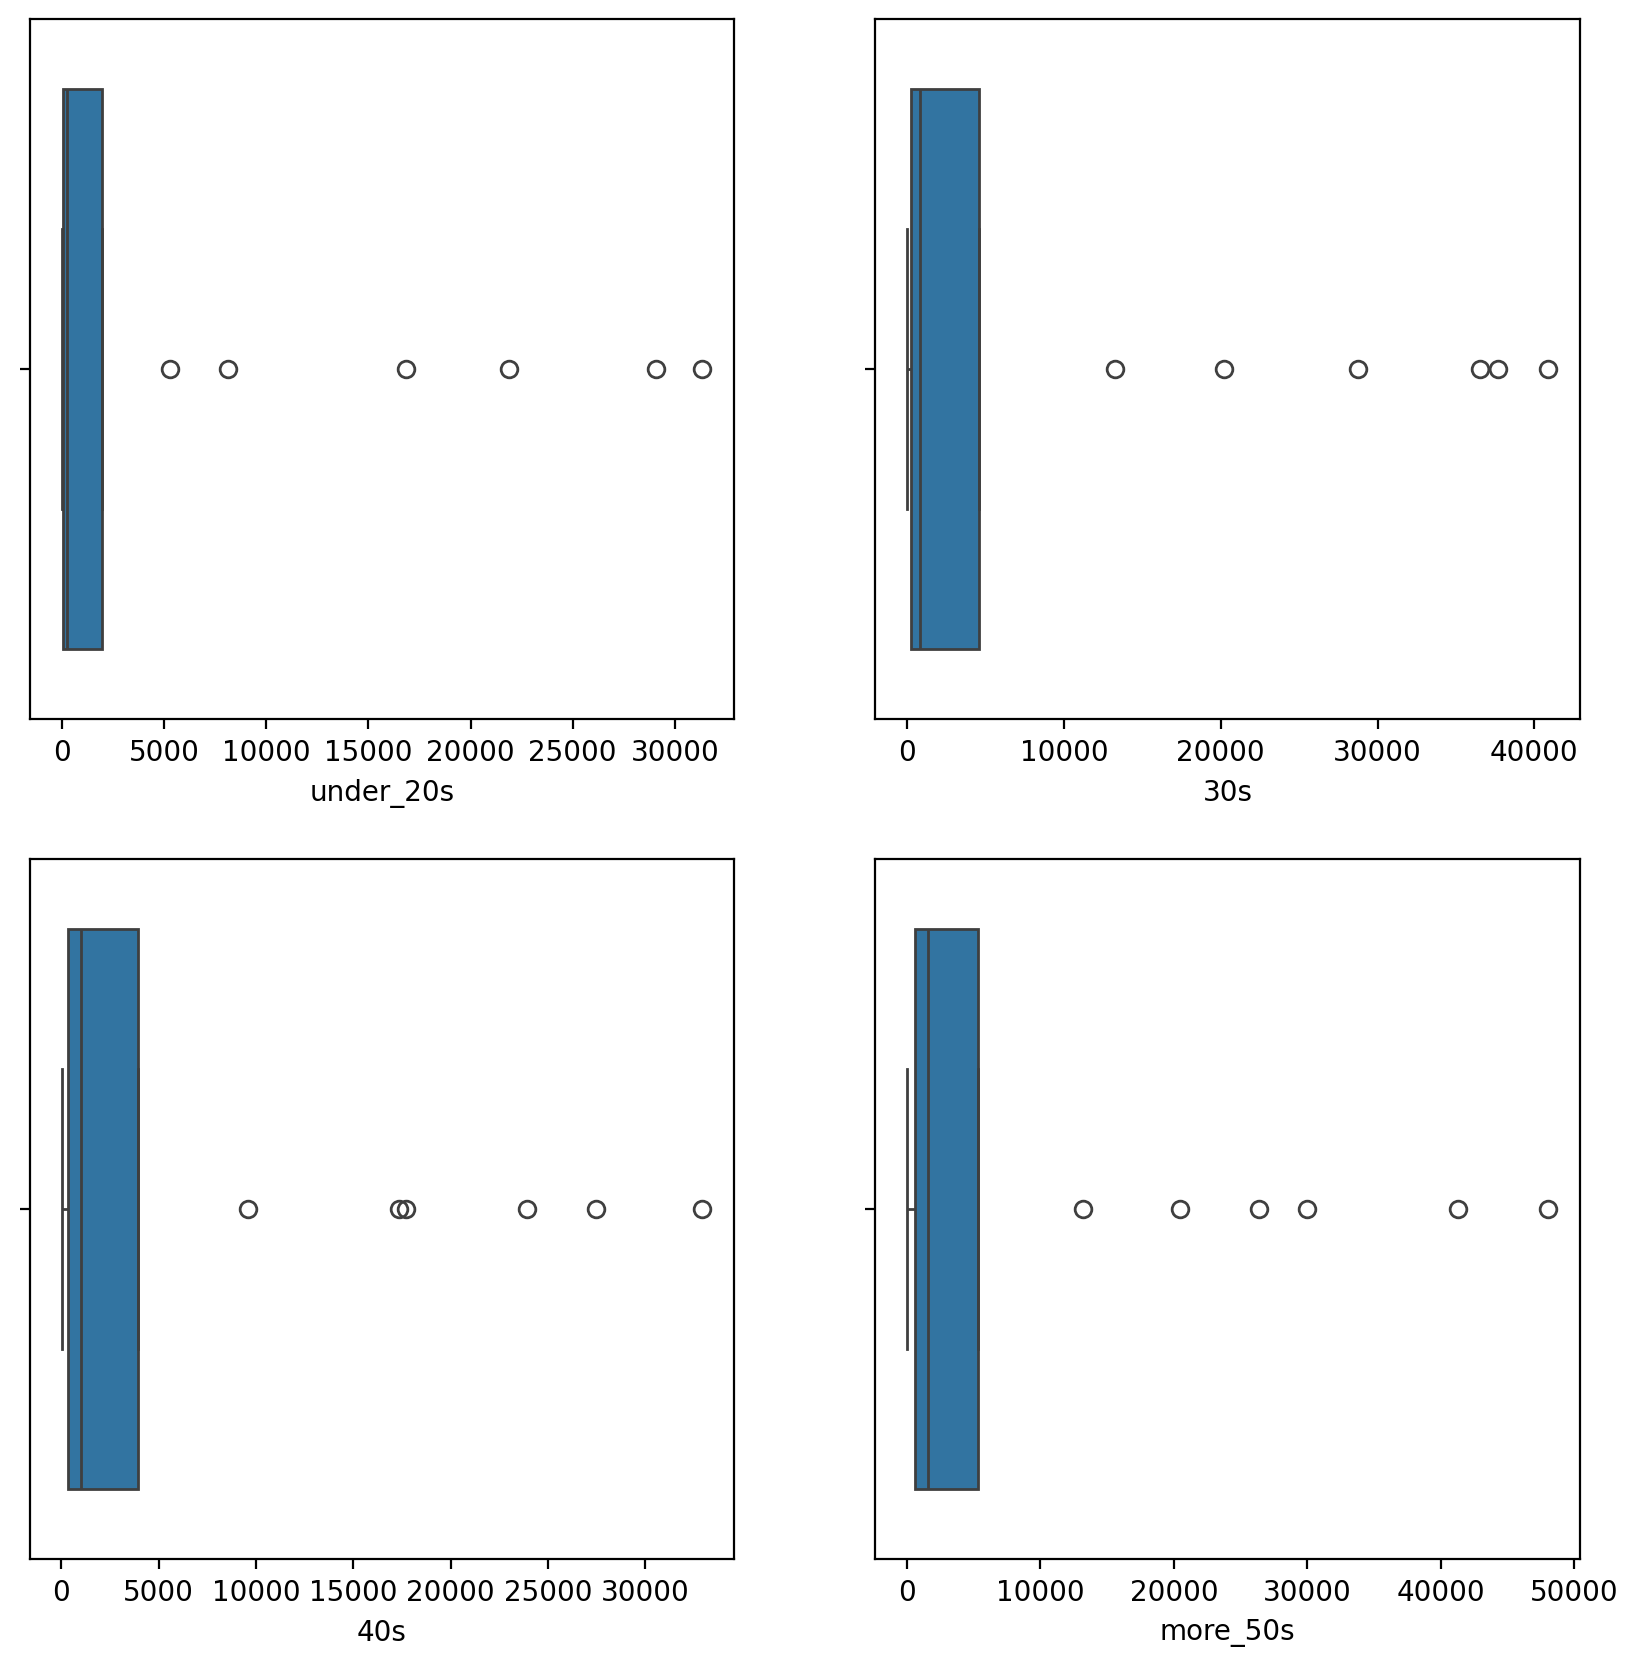

In [5]:
# 선택한 변수의 데이터 값 시각화

plt.figure(figsize=(10,10), dpi=200)

plt.subplot(2,2,1)
sns.boxplot(x = 'under_20s', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = '30s', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = '40s', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'more_50s', data = df)

plt.show()


In [6]:
# 로그 함수를 적용하여 값의 분포를 고르게 조정

df['under_20s_log'] = np.log1p(df['under_20s'])
df['30s_log'] = np.log1p(df['30s'])
df['40s_log'] = np.log1p(df['40s'])
df['more_50s_log'] = np.log1p(df['more_50s'])

/tmp/ipykernel_83494/3431555455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['under_20s_log'] = np.log1p(df['under_20s'])
/tmp/ipykernel_83494/3431555455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['30s_log'] = np.log1p(df['30s'])
/tmp/ipykernel_83494/3431555455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

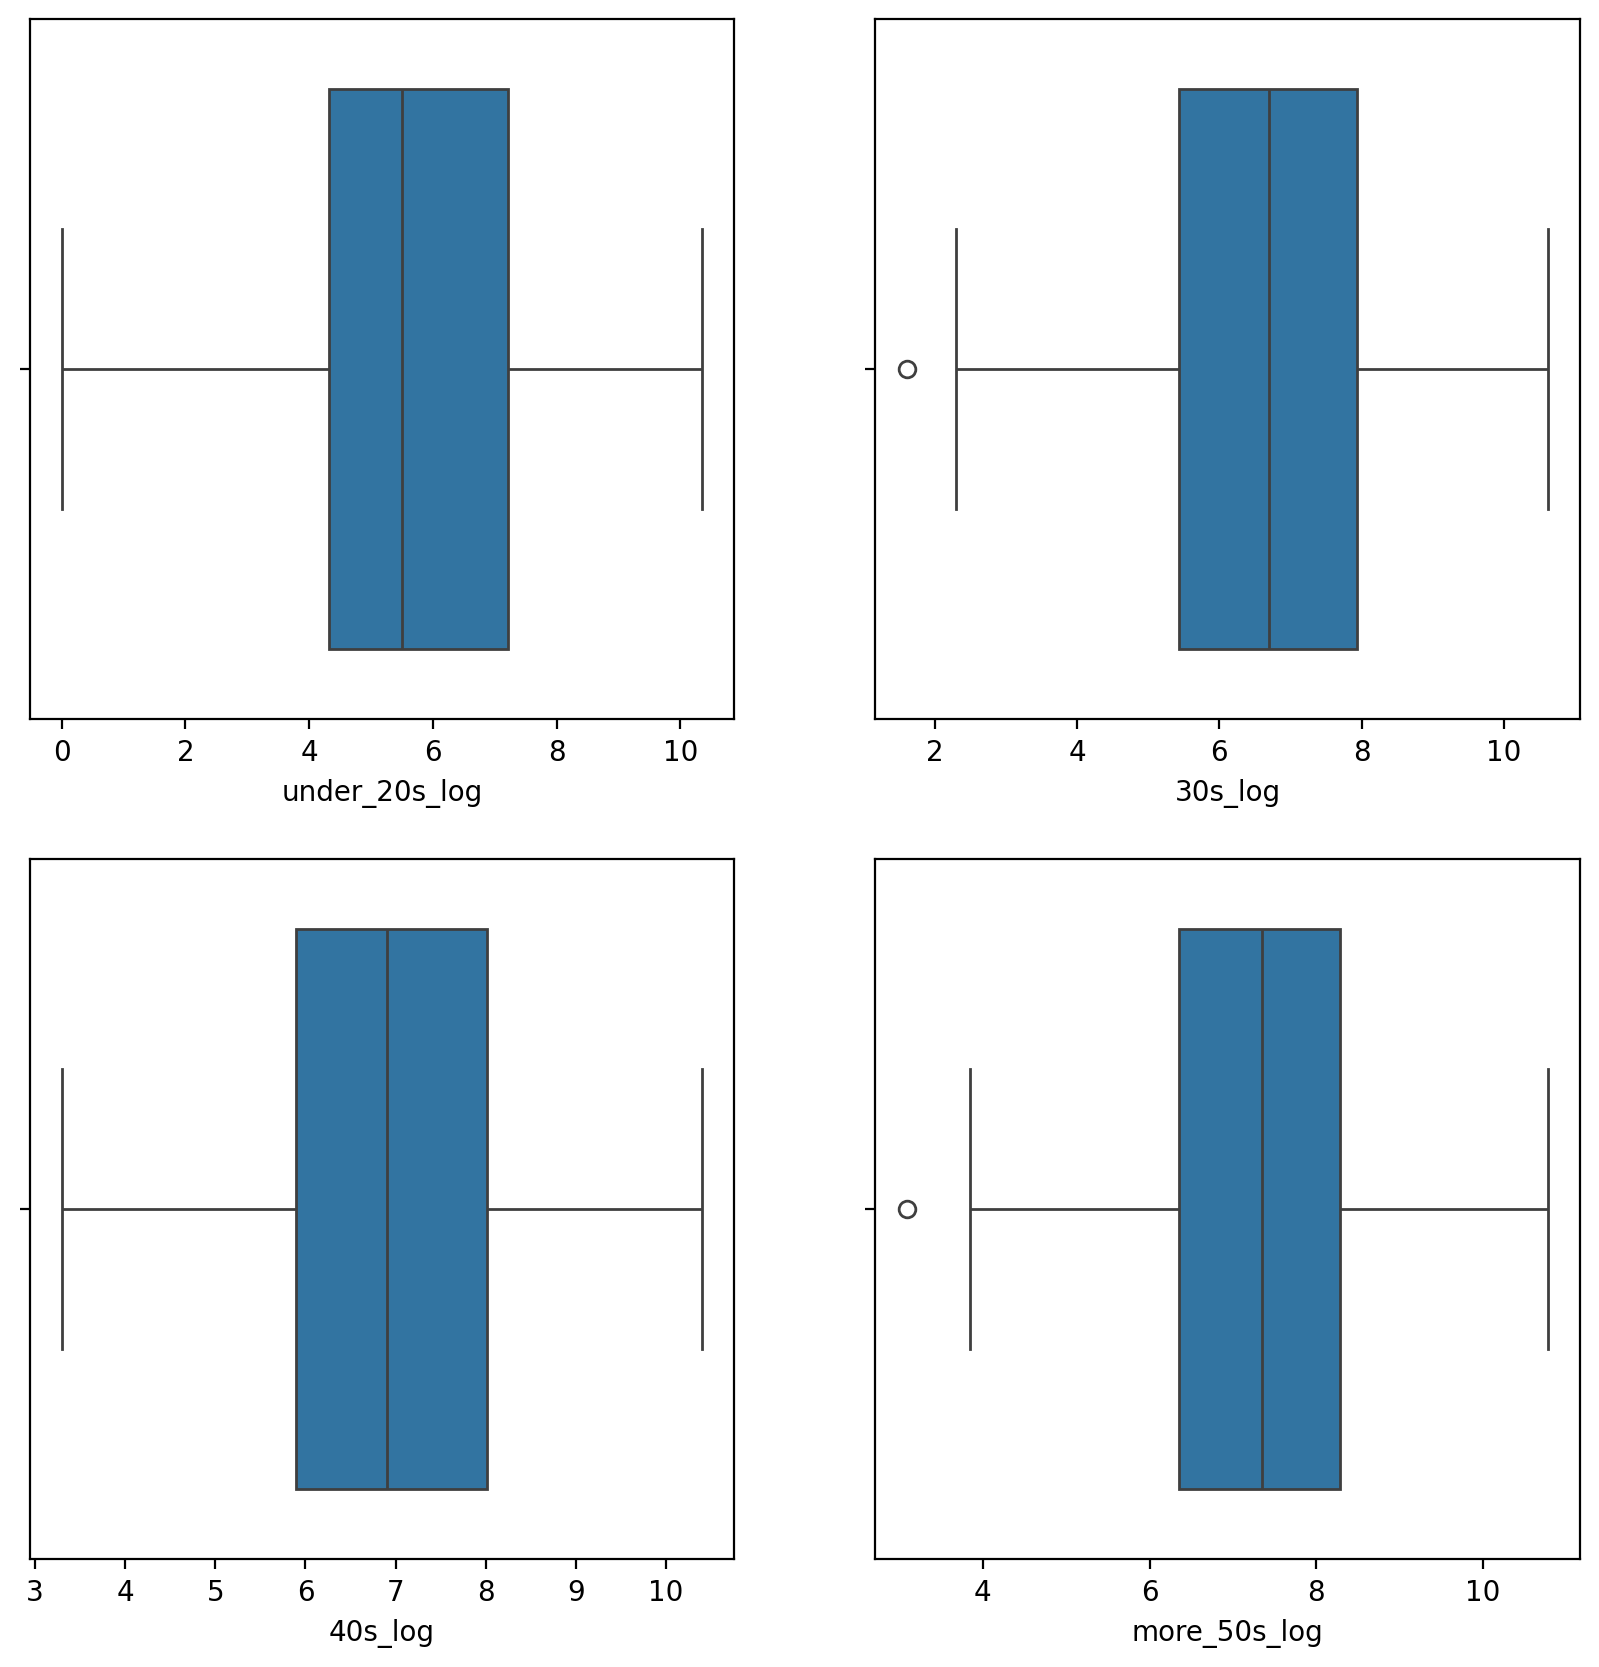

In [7]:
plt.figure(figsize=(10,10), dpi=200)

plt.subplot(2,2,1)
sns.boxplot(x = 'under_20s_log', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = '30s_log', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = '40s_log', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'more_50s_log', data = df)

plt.show()


In [8]:
le = LabelEncoder()
df['market'] = le.fit_transform(df['market'])

X_features = df[['under_20s_log', '30s_log', '40s_log', 'more_50s_log']].values

X_features_scaled = StandardScaler().fit_transform(X_features)

/tmp/ipykernel_83494/226081894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market'] = le.fit_transform(df['market'])


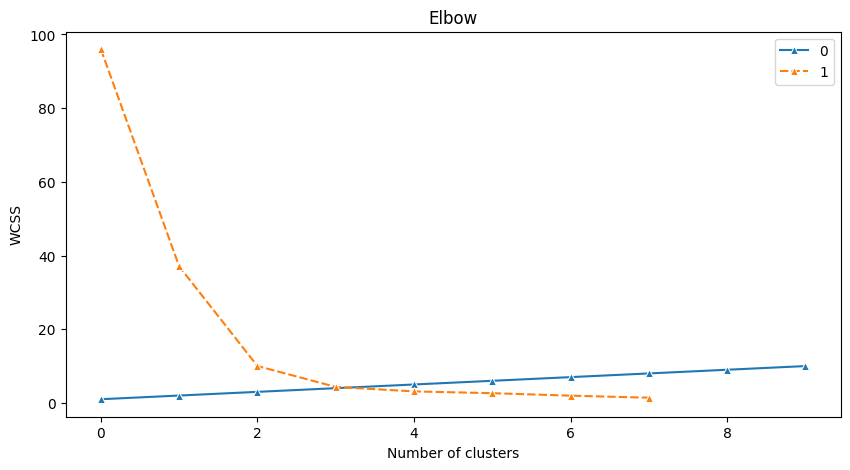

In [9]:
# 앨보 방법으로 클러스터 개수 k 선택하기

wcss = []

for i in range(1, 9):
    kmeans_i = KMeans(n_clusters=i, random_state=42) 
    kmeans_i.fit(X_features_scaled)
    wcss.append(kmeans_i.inertia_)

# 엘보우 방법 결과 시각화
plt.figure(figsize=(10,5)) # 새로운 그림 창 생성한 후 그림 크기 설정
sns.lineplot(data=(range(1, 11), wcss), marker='^') 

plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- 클러스터가 3인 부분부터 안정화됨으로 엘보는 3

In [10]:
kmeans = KMeans(n_clusters = 3) # KMeans 클러스터링을 사용하여 데이터를 클러스터링
kmeans.fit(X_features_scaled)

# 클러스터별 중심점 분석
cluster_centers = kmeans.cluster_centers_

for i in range(len(cluster_centers)):
    print("Cluster", i+1)
    print(cluster_centers[i])

Cluster 1
[-1.68712951 -1.73134022 -1.6516459  -1.74216039]
Cluster 2
[1.40093723 1.40890141 1.4413289  1.41172992]
Cluster 3
[-0.22294899 -0.21729252 -0.24620238 -0.21625989]


- Cluster 1: 평균적으로 모든 차원의 값이 양수에 가까움. 상대적으로 모든 차원의 값이 높은 경향을 보이는 클러스터
    - 해당 클러스터의 시장이 모든 연령대에서 상대적으로 높은 카드 이용자수를 가지고 있는 것을 의미
- Cluster 2: 평균적으로 모든 차원의 값이 음수에 가까움. 상대적으로 모든 차원의 값이 낮은 경향을 보이는 클러스터
    - 해당 클러스터의 시장이 모든 연령대에서 상대적으로 낮은 카드 이용자수를 가지고 있는 것을 의미
- Cluster 3: 평균적으로 모든 차원의 값이 음수에 가까움. 하지만 Cluster 2보다는 값이 더 작은것으로 보아 Cluster 2보다 모든 차원의 값이 더 낮은 경향을 보임
    - 해당 클러스터의 시장이 모든 연령대에서 Cluster 2보다 상대적으로 더 낮은 카드 이용자수를 가지고 있는 것을 의미

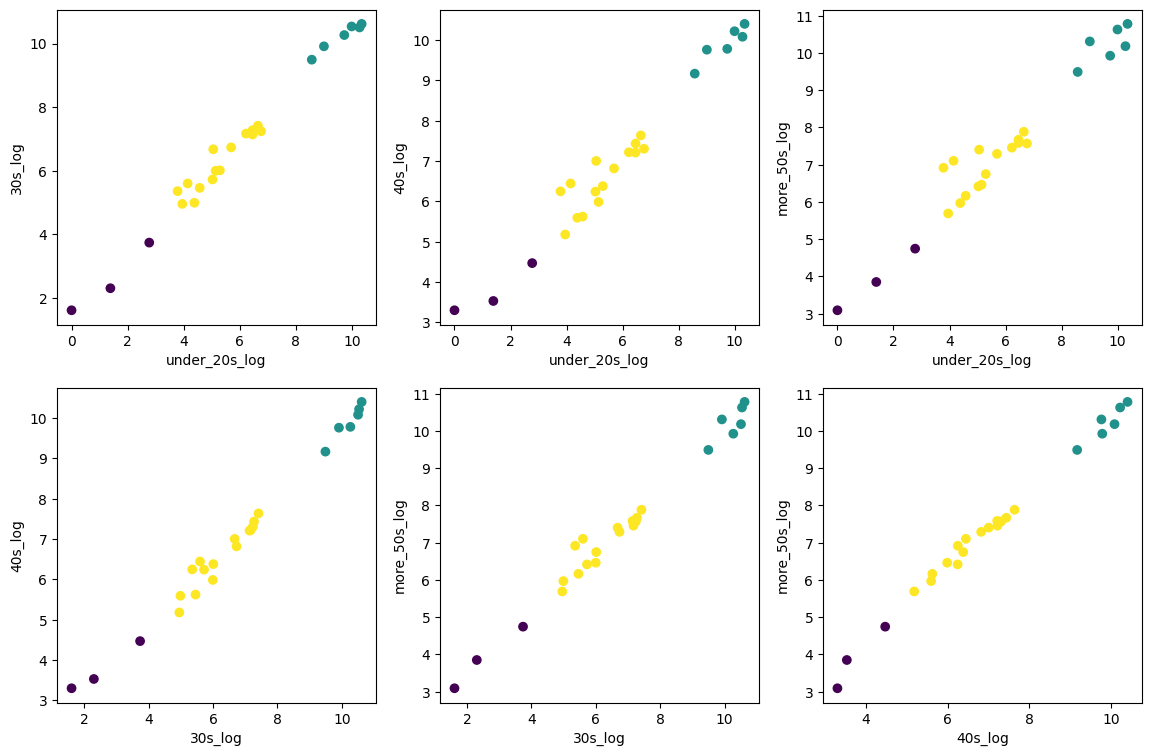

In [11]:
# 클러스터링 결과를 scatter로 시각화
labels = kmeans.predict(X_features_scaled)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3) 
fig.set_size_inches(14,9)

ax1.set(xlabel='under_20s_log', ylabel='30s_log')
ax2.set(xlabel='under_20s_log', ylabel='40s_log')
ax3.set(xlabel='under_20s_log', ylabel='more_50s_log')
ax4.set(xlabel='30s_log', ylabel='40s_log')
ax5.set(xlabel='30s_log', ylabel='more_50s_log')
ax6.set(xlabel='40s_log', ylabel='more_50s_log')

ax1.scatter(x=df['under_20s_log'], y=df['30s_log'], c=labels)
ax2.scatter(x=df['under_20s_log'], y=df['40s_log'], c=labels)
ax3.scatter(x=df['under_20s_log'], y=df['more_50s_log'], c=labels)
ax4.scatter(x=df['30s_log'], y=df['40s_log'], c=labels)
ax5.scatter(x=df['30s_log'], y=df['more_50s_log'], c=labels)
ax6.scatter(x=df['40s_log'], y=df['more_50s_log'], c=labels)

plt.show()

- 모든 경우의 수에 대하여 산점도를 파악해 본 결과 우상향의 그래프가 나타남. 두 변수 간에 양의 관계가 있음을 보여줌.
- 예를 들어 20대 이하 이용자 수와 50대 이상 이용자 수를 비교할 때, 한 시장에서 20대 이하의 이용자가 많으면, 같은 시장에서 50대 이상의 이용자 또한 일반적으로 많다는 것을 나타냄
- 20대와 50대간의 시장 이용율에 차이가 있을 것이라 예상했으나 그렇지 않았음.
- 하지만 특정한 연령을 타겟으로한 이벤트를 개최해보는 것도 시장 운영에 좋을 것 같다고 생각함.

In [12]:
# 실루엣 점수 계산

silhouette = silhouette_score(X_features_scaled, labels)
print("실루엣 점수:", silhouette)

실루엣 점수: 0.6689176456772552


- 1에 가까운 실루엣 점수는 클러스터가 잘 형성되었음 의미
- 0에 가까운 실루엣 점수는 클러스터 경계가 서로 중첩되거나 클러스터가 너무 가깝게 형성되었음을 의미
- -1에 가까운 실루엣 점수는 잘못된 클러스터링을 의미

결과 0.612... 으로 0보다 1에 더 가까움. 따라서 클러스터가 비교적 잘 형성되었음을 확인할 수 있음.